# Produce a world market research with Python

## <i>Exploration and data cleaning</i>

My mission here for <i>La Poule qui chante</i> is to analyze the global chicken market to help them choose their direction for international development.

All data have been sourced from www.fao.org for the year 2017.

In this part, we will start by determining the relevant indicators for our mission and prepare the data for the rest of the analysis.

 <br>
 
<u> Summary</u> :

 Tools [(here)](#another_cell_0)

 I. Explore and clean <a href="https://github.com/donia-nefiz/Produce-a-world-market-research-with-Python" target="_blank">world market research data</a><br>
     -- A. Worldwilde chicken consumption and sale (2017)<br>
     ---- 1. [chicken_consumption.csv](http://localhost:8888/edit/chicken_consum_2017.csv) : exploration and data cleaning [(here)](#another_cell_a)<br>
     ---- 2. [chicken_availibility.csv](http://localhost:8888/edit/chicken_avail_2017.csv) : exploration and data cleaning [(here)](#another_cell_b)<br>
     ---- 3. [chicken_availibility_per_habitant.csv](http://localhost:8888/edit/chicken_avail_per_hab_2017.csv) : exploration and data cleaning [(here)](#another_cell_c)<br>
     ---- 4.  [chicken_production.csv](http://localhost:8888/edit/chicken_prod_2017.csv) : exploration and data cleaning [(here)](#another_cell_d)<br>
     ---- 5.   [chicken_exportation.csv](http://localhost:8888/edit/chicken_export_2017.csv) : exploration and data cleaning [(here)](#another_cell_e)<br>
     ---- 6.   [chicken_importation.csv](http://localhost:8888/edit/chicken_import_2017.csv) : exploration and data cleaning [(here)](#another_cell_f)<br>
     ---- 7. Merge dataframes, explore and clean [(here)](#another_cell_g)<br>
     -- Conclusion (part I/a) [(here)](#another_cell_h)<br>
      <br>
     -- B. Global macroeconomic and political data (2017)<br>
     ---- 1. [data_population.csv](http://localhost:8888/edit/data_population_2017.csv) : exploration and data cleaning [(here)](#another_cell_i)<br>
     ---- 2. [data_political_stability.csv](http://localhost:8888/edit/data_political_stability_2017.csv) : exploration and data cleaning [(here)](#another_cell_j)<br>
     ---- 3. [data_gdp_per_hab.csv](http://localhost:8888/edit/data_PIB_hab_2017.csv) : exploration and data cleaning [(here)](#another_cell_k)<br>
     ---- 4.  [data_inflation.csv](http://localhost:8888/edit/data_inflation_food_month_2017.csv) : exploration and data cleaning [(here)](#another_cell_l)<br>
     ---- 5. Final merge, explore and clean [(here)](#another_cell_m)<br>
     -- Conclusion (part I/b) [(here)](#another_cell_n)<br>
     
  Conclusion [(here)](#another_cell_0)

 <a id='another_cell_0'></a>

### Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Check null values function :
def check_nan(data, column):
    if len(data[data[column].isnull()]) == 0:
        print ("The column", column, "does not contain any missing values")
    else :
        print("The column", column, "contain ", len(data[data[column].isnull()]), " missing values")

In [3]:
#Check duplicates function :
def check_duplicates(data, column):
    n = len(data.index)
    if len(data[column].drop_duplicates()) == n :
        print ("The column", column, "does not contain duplicates")
    else :
        print("The column", column, "contains ", len(data[data[column].duplicated()]), " duplicates.")
        return data[data[column].duplicated()]

## I. World market research data, files exploration and data cleaning

### A. Worldwilde chicken consumption and sale (2017)

<a id='another_cell_a'></a>

#### 1. [chicken_consumption.csv](http://localhost:8888/edit/chicken_consum_2017.csv) : exploration and data cleaning

- Loading file:

In [4]:
chicken_consum = pd.read_csv('chicken_consum_2017.csv', sep=';')

- First 5 rows display :

In [5]:
chicken_consum.head()

,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Année,Unité,Valeur
0,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,55
1,202,Afrique du Sud,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,2035
2,3,Albanie,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,47
3,4,Algérie,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,264
4,79,Allemagne,5142,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,1609


- Number of rows and columns :

In [6]:
chicken_consum.shape

(170, 9)

- .info display :

In [7]:
chicken_consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Code Produit  170 non-null    int64 
 5   Produit       170 non-null    object
 6   Année         170 non-null    int64 
 7   Unité         170 non-null    object
 8   Valeur        170 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.1+ KB


- Check null and duplicates values :

In [8]:
check_nan(chicken_consum, "Code zone")
check_duplicates(chicken_consum, "Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken consumption data give information on the chicken consumption of every country in the world : their zone code (primary key), the name of zone and the value of chicken consumption (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [9]:
chicken_consum['Valeur'] = chicken_consum['Valeur'] * 1000
chicken_consum.rename(columns={"Valeur":"Consommation de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [10]:
chicken_consum.drop(columns =['Code Élément', 'Élément', 'Code Produit', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_consum.head()

,Code zone,Zone,Consommation de poulet (en tonnes)
0,2,Afghanistan,55000
1,202,Afrique du Sud,2035000
2,3,Albanie,47000
3,4,Algérie,264000
4,79,Allemagne,1609000


- Outliers on the variable "Consommation de poulet" : 

---------------------------------------------------------------------------------------------------- 



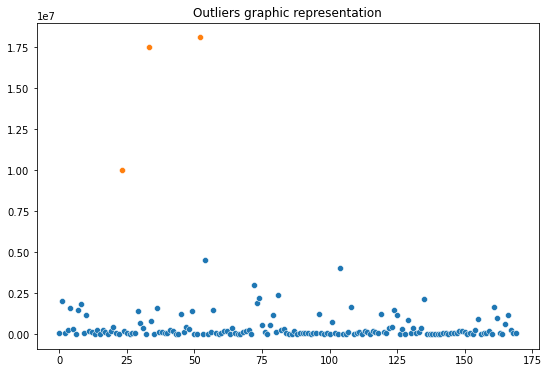

---------------------------------------------------------------------------------------------------- 



,Code zone,Zone,Consommation de poulet (en tonnes),zscore
52,231,États-Unis d'Amérique,18100000,8.164090
33,41,"Chine, continentale",17518000,7.891688
23,21,Brésil,9982000,4.364499


In [11]:
outliers = chicken_consum.copy()
outliers["zscore"] = (outliers["Consommation de poulet (en tonnes)"] - outliers["Consommation de poulet (en tonnes)"].mean())/outliers["Consommation de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Consommation de poulet (en tonnes)"].index, y=the_ok["Consommation de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Consommation de poulet (en tonnes)"].index, y=the_outliers["Consommation de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken consumption.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest consumers of chicken in the world are : the USA, China and Brazil</li>
</i></div>

 <a id='another_cell_b'></a>


#### 2. [chicken_availibility.csv](http://localhost:8888/edit/chicken_avail_2017.csv) : exploration and data cleaning

- Loading file:

In [12]:
chicken_avail = pd.read_csv('chicken_avail_2017.csv', sep=';')

- First 5 rows display :

In [13]:
chicken_avail.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57
1,202,Afrique du Sud,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,2118
2,3,Albanie,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,47
3,4,Algérie,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,277
4,79,Allemagne,5301,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,1739


- Number of rows and columns :

In [14]:
chicken_avail.shape

(170, 8)

- .info display :

In [15]:
chicken_avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Produit       170 non-null    object
 5   Année         170 non-null    int64 
 6   Unité         170 non-null    object
 7   Valeur        170 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


- Check missing and duplicate values :

In [16]:
check_nan(chicken_avail, "Code zone")
check_duplicates(chicken_avail,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken availibility data give information on the chicken availibility of every country in the world : their zone code (primary key), the name of zone and the value of chicken availibility (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [17]:
chicken_avail['Valeur'] = chicken_avail['Valeur'] * 1000
chicken_avail.rename(columns={"Valeur":"Disponibilité de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [18]:
chicken_avail.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_avail.head()

,Code zone,Disponibilité de poulet (en tonnes)
0,2,57000
1,202,2118000
2,3,47000
3,4,277000
4,79,1739000


- Outliers on the variable "Disponibilité de poulet" : 

---------------------------------------------------------------------------------------------------- 



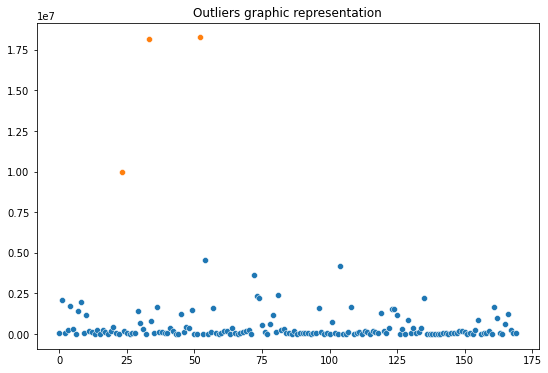

---------------------------------------------------------------------------------------------------- 



,Code zone,Disponibilité de poulet (en tonnes),zscore
52,231,18266000,8.037001
33,41,18161000,7.988994
23,21,9982000,4.249484


In [19]:
outliers = chicken_avail.copy()
outliers["zscore"] = (outliers["Disponibilité de poulet (en tonnes)"] - outliers["Disponibilité de poulet (en tonnes)"].mean())/outliers["Disponibilité de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Disponibilité de poulet (en tonnes)"].index, y=the_ok["Disponibilité de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Disponibilité de poulet (en tonnes)"].index, y=the_outliers["Disponibilité de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken availibility.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest availibility of chicken in the world are in : the USA, China and Brazil</li>
</i></div>

  <a id='another_cell_c'></a>

#### 3. [chicken_availibility_per_habitant.csv](http://localhost:8888/edit/chicken_avail_per_hab_2017.csv) : exploration and data cleaning


- Loading file:

In [20]:
chicken_avail_per_hab = pd.read_csv('chicken_avail_per_hab_2017.csv', sep=';')

- First 5 rows display :

In [21]:
chicken_avail_per_hab.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,1.53
1,202,Afrique du Sud,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,35.69
2,3,Albanie,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,16.36
3,4,Algérie,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,6.38
4,79,Allemagne,645,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,19.47


- Number of rows and columns :

In [22]:
chicken_avail_per_hab.shape

(172, 8)

- .info display :

In [23]:
chicken_avail_per_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     172 non-null    int64  
 1   Zone          172 non-null    object 
 2   Code Élément  172 non-null    int64  
 3   Élément       172 non-null    object 
 4   Produit       172 non-null    object 
 5   Année         172 non-null    int64  
 6   Unité         172 non-null    object 
 7   Valeur        172 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 10.9+ KB


- Check missing and duplicate values :

In [24]:
check_nan(chicken_avail_per_hab, "Code zone")
check_duplicates(chicken_avail_per_hab,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken availibility per habitant data give information on the chicken average availibility per habitant of every country in the world : their zone code (primary key), the name of zone and the value of chicken average availibility per habitant (in kg)</br></li>
<li> There are 172 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Rename the last column :

In [25]:
chicken_avail_per_hab.rename(columns={"Valeur":"Disponibilité alimentaire moyenne par habitant (en kg)"}, inplace=True)

- Removed some unnecessary columns :

In [26]:
chicken_avail_per_hab.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_avail_per_hab.head()

,Code zone,Disponibilité alimentaire moyenne par habitant (en kg)
0,2,1.53
1,202,35.69
2,3,16.36
3,4,6.38
4,79,19.47


- Outliers on the variable "Disponibilité alimentaire moyenne par habitant" :

---------------------------------------------------------------------------------------------------- 



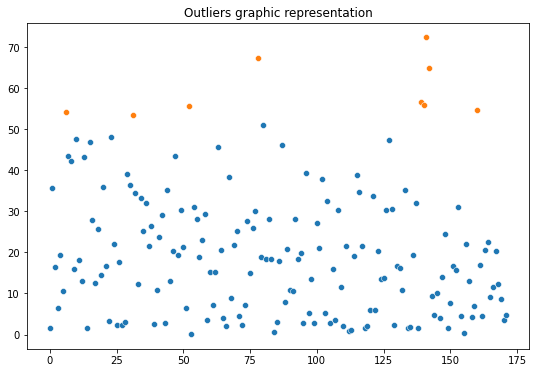

---------------------------------------------------------------------------------------------------- 



,Code zone,Disponibilité alimentaire moyenne par habitant (en kg),zscore
141,191,72.31,3.284717
78,105,67.39,2.974508
142,244,64.77,2.809316
139,189,56.69,2.299868
140,188,55.77,2.241862
52,231,55.68,2.236187
160,220,54.54,2.164310
6,8,54.10,2.136568
31,96,53.51,2.099368


In [27]:
outliers = chicken_avail_per_hab.copy()
outliers["zscore"] = (outliers["Disponibilité alimentaire moyenne par habitant (en kg)"] - outliers["Disponibilité alimentaire moyenne par habitant (en kg)"].mean())/outliers["Disponibilité alimentaire moyenne par habitant (en kg)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Disponibilité alimentaire moyenne par habitant (en kg)"].index, y=the_ok["Disponibilité alimentaire moyenne par habitant (en kg)"].values,)
sns.scatterplot(x=the_outliers["Disponibilité alimentaire moyenne par habitant (en kg)"].index, y=the_outliers["Disponibilité alimentaire moyenne par habitant (en kg)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken availibility per habitant.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

In [28]:
print("Numbers of outliers detected :", len(the_outliers))

Numbers of outliers detected : 9


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 9</br></li>
<i><li> The countries concerned are moslty islands, Israel, USA and China</li>
</i></div>

<a id='another_cell_d'></a>

#### 4. [chicken_production.csv](http://localhost:8888/edit/chicken_prod_2017.csv) : exploration and data cleaning

- Loading file:

In [29]:
chicken_prod = pd.read_csv('chicken_prod_2017.csv', sep=';')

- First 5 rows display :

In [30]:
chicken_prod.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5511,Production,Viande de Volailles,2017,Milliers de tonnes,28
1,202,Afrique du Sud,5511,Production,Viande de Volailles,2017,Milliers de tonnes,1667
2,3,Albanie,5511,Production,Viande de Volailles,2017,Milliers de tonnes,13
3,4,Algérie,5511,Production,Viande de Volailles,2017,Milliers de tonnes,275
4,79,Allemagne,5511,Production,Viande de Volailles,2017,Milliers de tonnes,1514


- Number of rows and columns :

In [31]:
chicken_prod.shape

(168, 8)

- .info display :

In [32]:
chicken_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     168 non-null    int64 
 1   Zone          168 non-null    object
 2   Code Élément  168 non-null    int64 
 3   Élément       168 non-null    object
 4   Produit       168 non-null    object
 5   Année         168 non-null    int64 
 6   Unité         168 non-null    object
 7   Valeur        168 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.6+ KB


- Check missing and duplicate values :

In [33]:
check_nan(chicken_prod, "Code zone")
check_duplicates(chicken_prod,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken production data give information on the chicken production of every country in the world : their zone code (primary key), the name of zone and the value of chicken production (in thousands of tons)</br></li>
<li> There are 168 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [34]:
chicken_prod['Valeur'] = chicken_prod['Valeur'] * 1000
chicken_prod.rename(columns={"Valeur":"Production de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [35]:
chicken_prod.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_prod.head()

,Code zone,Production de poulet (en tonnes)
0,2,28000
1,202,1667000
2,3,13000
3,4,275000
4,79,1514000


- Outliers on the variable "Production de poulet" : 

---------------------------------------------------------------------------------------------------- 



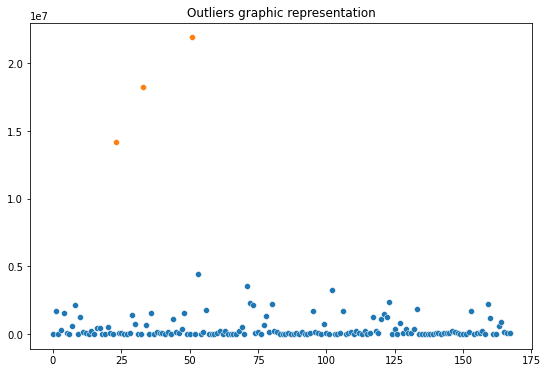

---------------------------------------------------------------------------------------------------- 



,Code zone,Production de poulet (en tonnes),zscore
51,231,21914000,8.470587
33,41,18236000,7.000244
23,21,14201000,5.387184


In [36]:
outliers = chicken_prod.copy()
outliers["zscore"] = (outliers["Production de poulet (en tonnes)"] - outliers["Production de poulet (en tonnes)"].mean())/outliers["Production de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Production de poulet (en tonnes)"].index, y=the_ok["Production de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Production de poulet (en tonnes)"].index, y=the_outliers["Production de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken production.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest production of chicken in the world are in : the USA, China and Brazil</li>
</i></div>

<a id='another_cell_e'></a>

#### 5. [chicken_exportation.csv](http://localhost:8888/edit/chicken_export_2017.csv) : exploration and data cleaning

- Loading file:

In [37]:
chicken_export = pd.read_csv('chicken_export_2017.csv', sep=';')

- First 5 rows display :

In [38]:
chicken_export.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,202,Afrique du Sud,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,63
1,3,Albanie,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0
2,4,Algérie,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0
3,79,Allemagne,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,646
4,7,Angola,5911,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0


- Number of rows and columns :

In [39]:
chicken_export.shape

(135, 8)

- .info display :

In [40]:
chicken_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     135 non-null    int64 
 1   Zone          135 non-null    object
 2   Code Élément  135 non-null    int64 
 3   Élément       135 non-null    object
 4   Produit       135 non-null    object
 5   Année         135 non-null    int64 
 6   Unité         135 non-null    object
 7   Valeur        135 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 8.6+ KB


- Check missing and duplicate values :

In [41]:
check_nan(chicken_export, "Code zone")
check_duplicates(chicken_export,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken exportation data give information on the chicken exportation of every country in the world : their zone code (primary key), the name of zone and the value of chicken exportation (in thousands of tons)</br></li>
<li> There are 135 country concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [42]:
chicken_export['Valeur'] = chicken_export['Valeur'] * 1000
chicken_export.rename(columns={"Valeur":"Exportation de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [43]:
chicken_export.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_export.head()

,Code zone,Exportation de poulet (en tonnes)
0,202,63000
1,3,0
2,4,0
3,79,646000
4,7,0


- Outliers on the variable "Exportation de poulet" : 

---------------------------------------------------------------------------------------------------- 



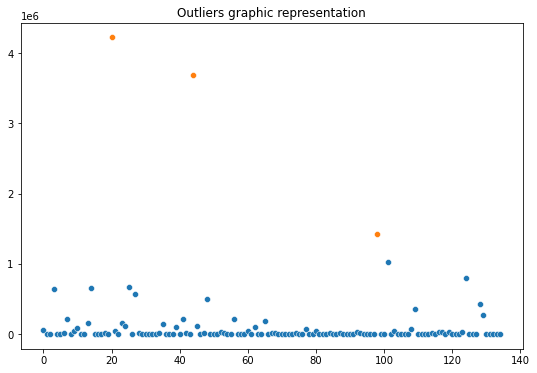

---------------------------------------------------------------------------------------------------- 



,Code zone,Exportation de poulet (en tonnes),zscore
20,21,4223000,7.962123
44,231,3692000,6.928615
98,150,1418000,2.502635


In [44]:
outliers = chicken_export.copy()
outliers["zscore"] = (outliers["Exportation de poulet (en tonnes)"] - outliers["Exportation de poulet (en tonnes)"].mean())/outliers["Exportation de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Exportation de poulet (en tonnes)"].index, y=the_ok["Exportation de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Exportation de poulet (en tonnes)"].index, y=the_outliers["Exportation de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken exportation.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The biggest exportation of chicken in the world are in : Brazil, USA and The Netherlands</li>
</i></div>

<a id='another_cell_f'></a>

#### 6. [chicken_importation.csv](http://localhost:8888/edit/chicken_import_2017.csv) : exploration and data cleaning


- Loading file:

In [45]:
chicken_import = pd.read_csv('chicken_import_2017.csv', sep=';')

- First 5 rows display :

In [46]:
chicken_import.head()

,Code zone,Zone,Code Élément,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29
1,202,Afrique du Sud,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,514
2,3,Albanie,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,38
3,4,Algérie,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,2
4,79,Allemagne,5611,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,842


- Number of rows and columns :

In [47]:
chicken_import.shape

(170, 8)

- .info display :

In [48]:
chicken_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Code zone     170 non-null    int64 
 1   Zone          170 non-null    object
 2   Code Élément  170 non-null    int64 
 3   Élément       170 non-null    object
 4   Produit       170 non-null    object
 5   Année         170 non-null    int64 
 6   Unité         170 non-null    object
 7   Valeur        170 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


- Check missing and duplicate values :

In [49]:
check_nan(chicken_import, "Code zone")
check_duplicates(chicken_import,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Chicken importation data give information on the chicken importation of every country in the world : their zone code (primary key), the name of zone and the value of chicken importation (in thousands of tons)</br></li>
<li> There are 170 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of tons to tons) :

In [50]:
chicken_import['Valeur'] = chicken_import['Valeur'] * 1000
chicken_import.rename(columns={"Valeur":"Importation de poulet (en tonnes)"}, inplace=True)

- Removed some unnecessary columns :

In [51]:
chicken_import.drop(columns =['Zone', 'Code Élément', 'Élément', 'Produit', 'Année', 'Unité'], inplace=True)
chicken_import.head()

,Code zone,Importation de poulet (en tonnes)
0,2,29000
1,202,514000
2,3,38000
3,4,2000
4,79,842000


- Outliers on the variable "Importation de poulet" : 

---------------------------------------------------------------------------------------------------- 



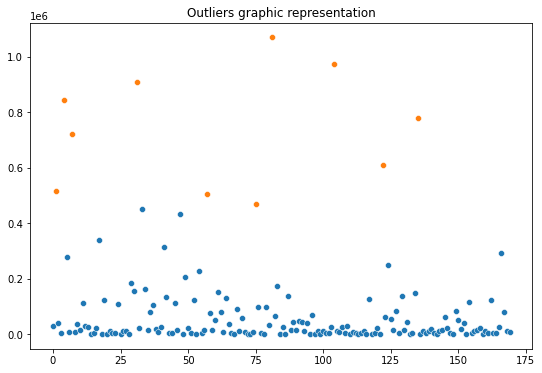

---------------------------------------------------------------------------------------------------- 



,Code zone,Importation de poulet (en tonnes),zscore
81,110,1069000,5.247071
104,138,972000,4.727437
31,96,907000,4.379229
4,79,842000,4.031021
135,229,779000,3.693527
7,194,722000,3.388175
122,150,608000,2.777472
1,202,514000,2.273909
57,68,506000,2.231053
75,103,470000,2.038199


In [52]:
outliers = chicken_import.copy()
outliers["zscore"] = (outliers["Importation de poulet (en tonnes)"] - outliers["Importation de poulet (en tonnes)"].mean())/outliers["Importation de poulet (en tonnes)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Importation de poulet (en tonnes)"].index, y=the_ok["Importation de poulet (en tonnes)"].values,)
sns.scatterplot(x=the_outliers["Importation de poulet (en tonnes)"].index, y=the_outliers["Importation de poulet (en tonnes)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on chicken importation.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

In [53]:
print("Numbers of outliers detected :", len(the_outliers))

Numbers of outliers detected : 10


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 10</br></li>
<i><li> The biggest importation of chicken in the world are in : Japon, Mexique, China, Germany, England, Saoudia, The Netherlands, South Africa, France and Iraq</li>
</i></div>

<a id='another_cell_g'></a>

#### 7. Merge dataframes, explore and clean

In [54]:
chickenALL1 = chicken_consum.merge(chicken_avail, how='left', on='Code zone').merge(chicken_avail_per_hab, how='left', on='Code zone').merge(chicken_prod, how='left', on='Code zone').merge(chicken_export, how='left', on='Code zone').merge(chicken_import, how='left', on='Code zone')
display(chickenALL1.head())

,Code zone,Zone,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en kg),Production de poulet (en tonnes),Exportation de poulet (en tonnes),Importation de poulet (en tonnes)
0,2,Afghanistan,55000,57000,1.53,28000.0,NaN,29000
1,202,Afrique du Sud,2035000,2118000,35.69,1667000.0,63000.0,514000
2,3,Albanie,47000,47000,16.36,13000.0,0.0,38000
3,4,Algérie,264000,277000,6.38,275000.0,0.0,2000
4,79,Allemagne,1609000,1739000,19.47,1514000.0,646000.0,842000


- Explore the final result :

In [55]:
chickenALL1.shape

(170, 8)

In [56]:
chickenALL1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code zone                                               170 non-null    int64  
 1   Zone                                                    170 non-null    object 
 2   Consommation de poulet (en tonnes)                      170 non-null    int64  
 3   Disponibilité de poulet (en tonnes)                     170 non-null    int64  
 4   Disponibilité alimentaire moyenne par habitant (en kg)  170 non-null    float64
 5   Production de poulet (en tonnes)                        168 non-null    float64
 6   Exportation de poulet (en tonnes)                       135 non-null    float64
 7   Importation de poulet (en tonnes)                       170 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory

- Check duplicate values :

In [57]:
check_duplicates(chickenALL1,"Code zone")

The column Code zone does not contain duplicates


- Fill NA/NaN values :

In [58]:
chickenALL1["Production de poulet (en tonnes)"].fillna(0, inplace=True)
chickenALL1["Exportation de poulet (en tonnes)"].fillna(0, inplace=True)
chickenALL1.info()
chickenALL1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code zone                                               170 non-null    int64  
 1   Zone                                                    170 non-null    object 
 2   Consommation de poulet (en tonnes)                      170 non-null    int64  
 3   Disponibilité de poulet (en tonnes)                     170 non-null    int64  
 4   Disponibilité alimentaire moyenne par habitant (en kg)  170 non-null    float64
 5   Production de poulet (en tonnes)                        170 non-null    float64
 6   Exportation de poulet (en tonnes)                       170 non-null    float64
 7   Importation de poulet (en tonnes)                       170 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory

,Code zone,Zone,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en kg),Production de poulet (en tonnes),Exportation de poulet (en tonnes),Importation de poulet (en tonnes)
0,2,Afghanistan,55000,57000,1.53,28000.0,0.0,29000
1,202,Afrique du Sud,2035000,2118000,35.69,1667000.0,63000.0,514000
2,3,Albanie,47000,47000,16.36,13000.0,0.0,38000
3,4,Algérie,264000,277000,6.38,275000.0,0.0,2000
4,79,Allemagne,1609000,1739000,19.47,1514000.0,646000.0,842000


<a id='another_cell_h'></a>

#### Conclusion (part I/a)

<div class="alert-success">
<i>→ We have 6 variables of consumption and sale of chicken in the world</i></br>
<br><i>→ 5 variables are in "tons" and 1 variable is in "kg"</i></br>
<i><br>→ There are between 135 and 172 countries concerned by these variables</br></i>
<i><br>→ All data files do not contain any missing value or duplicates on the primary key ("Code zone")</i></br>
<i><br>→ All data files contain between 3 and 10 data outliers :</i></br>
<i><br>---- 🗴 The USA and Brazil consume, product and export chicken a lot but import less, at first glance they don't seem to be very good customers for La Poule qui chante</i></br>
<i><br>---- - The Netherlands export a lot but import less</i></br>
<i><br>---- 🗸 Japan, Mexico, Germany, England, Saoudia, South Africa, France and Iraq import chicken a lot ; those seem to be good clients for La Poule qui chante</i></br>
<i><br>---- 🗸 China consume, product and import chicken a lot ; it seems to be a good client too for La Poule qui chante</i></br>
</i></div>

### B. Global macroeconomic and political data (2017)

<a id='another_cell_i'></a>

#### 1. [data_population.csv](http://localhost:8888/edit/data_population_2017.csv) : exploration and data cleaning

- Loading file:

In [59]:
data_pop = pd.read_csv('data_population_2017.csv', sep=';')

- First 5 rows display :

In [60]:
data_pop.head()

,Code zone,Zone,Élément,Année,Unité,Valeur
0,2,Afghanistan,Population totale,2017,1000 personnes,36296.113
1,202,Afrique du Sud,Population totale,2017,1000 personnes,57009.756
2,3,Albanie,Population totale,2017,1000 personnes,2884.169
3,4,Algérie,Population totale,2017,1000 personnes,41389.189
4,79,Allemagne,Population totale,2017,1000 personnes,82658.409


- Number of rows and columns :

In [61]:
data_pop.shape

(235, 6)

- .info display :

In [62]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  235 non-null    int64  
 1   Zone       235 non-null    object 
 2   Élément    235 non-null    object 
 3   Année      235 non-null    int64  
 4   Unité      235 non-null    object 
 5   Valeur     235 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.1+ KB


- Check null and duplicates values :

In [63]:
check_nan(chicken_consum, "Code zone")
check_duplicates(chicken_consum, "Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Population data provides information on the demography of countries in the world : their zone code (primary key), the name of zone and the number of inhabitants of each country (in thousands of inhabitants)</br></li>
<li> There are 235 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Values conversion (from thousands of inhabitants in population units) :

In [64]:
data_pop['Valeur'] = data_pop['Valeur'] * 1000
data_pop.rename(columns={"Valeur":"Population (en unité)"}, inplace=True)

- Removed some unnecessary columns :

In [65]:
data_pop.drop(columns =['Zone', 'Élément', 'Année', 'Unité'], inplace=True)
data_pop.head()

,Code zone,Population (en unité)
0,2,36296113.0
1,202,57009756.0
2,3,2884169.0
3,4,41389189.0
4,79,82658409.0


- Outliers on the variable "Population" : 

---------------------------------------------------------------------------------------------------- 



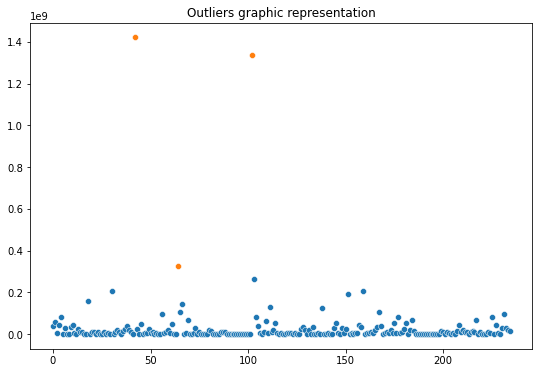

---------------------------------------------------------------------------------------------------- 



,Code zone,Population (en unité),zscore
42,41,1.421022e+09,10.509249
102,100,1.338677e+09,9.886179
64,231,3.250848e+08,2.216753


In [103]:
outliers = data_pop.copy()
outliers["zscore"] = (outliers["Population (en unité)"] - outliers["Population (en unité)"].mean())/outliers["Population (en unité)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Population (en unité)"].index, y=the_ok["Population (en unité)"].values,)
sns.scatterplot(x=the_outliers["Population (en unité)"].index, y=the_outliers["Population (en unité)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on the worldwilde population.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 3</br></li>
<i><li> The most important demographies in the world in 2017 are in: China, India and the USA</li>
</i></div>

<a id='another_cell_j'></a>

#### 2. [data_political_stability.csv](http://localhost:8888/edit/data_political_stability_2017.csv) : exploration and data cleaning

- Loading file:

In [67]:
data_pol_stab = pd.read_csv('data_political_stability_2017.csv', sep=';')

- First 5 rows display :

In [68]:
data_pol_stab.head()

,Code zone,Zone,Code Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,6125,Stabilité politique et absence de violence/ter...,2017,indice,-2.80
1,202,Afrique du Sud,6125,Stabilité politique et absence de violence/ter...,2017,indice,-0.28
2,3,Albanie,6125,Stabilité politique et absence de violence/ter...,2017,indice,0.38
3,4,Algérie,6125,Stabilité politique et absence de violence/ter...,2017,indice,-0.92
4,79,Allemagne,6125,Stabilité politique et absence de violence/ter...,2017,indice,0.59


- Number of rows and columns :

In [69]:
data_pol_stab.shape

(204, 7)

- .info display :

In [70]:
data_pol_stab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     204 non-null    int64  
 1   Zone          204 non-null    object 
 2   Code Élément  204 non-null    int64  
 3   Produit       204 non-null    object 
 4   Année         204 non-null    int64  
 5   Unité         204 non-null    object 
 6   Valeur        197 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.3+ KB


- Fill NA/NaN values :

In [71]:
data_pol_stab['Valeur'].fillna(0, inplace=True)
data_pol_stab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     204 non-null    int64  
 1   Zone          204 non-null    object 
 2   Code Élément  204 non-null    int64  
 3   Produit       204 non-null    object 
 4   Année         204 non-null    int64  
 5   Unité         204 non-null    object 
 6   Valeur        204 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.3+ KB


- Check min and max values :

In [72]:
print("Country stability indices are range from", data_pol_stab['Valeur'].min(), "to",data_pol_stab['Valeur'].max())

Country stability indices are range from -2.94 to 1.92


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Political stability data provides information on the political stability and terrorism in the worldwilde countries : their zone code (primary key), the name of zone and the political stability index of each country (between -2,94 and 1,92)</br></li>
<li> There are 204 countries concerned in 2017</li>
</i></div>

- Rename the column "Valeur" :

In [73]:
data_pol_stab.rename(columns={"Valeur":"Indice de stabilité politique"}, inplace=True)

- Removed some unnecessary columns :

In [74]:
data_pol_stab.drop(columns =['Zone', 'Code Élément', 'Produit', 'Année', 'Unité'], inplace=True)
data_pol_stab.head()

,Code zone,Indice de stabilité politique
0,2,-2.80
1,202,-0.28
2,3,0.38
3,4,-0.92
4,79,0.59


- Outliers on the variable "Indice de stabilité politique" : 

---------------------------------------------------------------------------------------------------- 



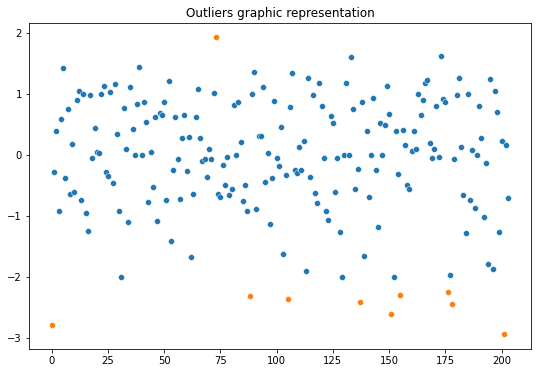

---------------------------------------------------------------------------------------------------- 



,Code zone,Indice de stabilité politique,zscore
73,85,1.92,2.025064
176,201,-2.26,-2.250812
155,250,-2.30,-2.291730
88,103,-2.31,-2.301959
105,124,-2.36,-2.353106
137,165,-2.41,-2.404253
178,277,-2.45,-2.445170
151,212,-2.62,-2.619070
0,2,-2.80,-2.803198
201,249,-2.94,-2.946409


In [75]:
outliers = data_pol_stab.copy()
outliers["zscore"] = (outliers["Indice de stabilité politique"] - outliers["Indice de stabilité politique"].mean())/outliers["Indice de stabilité politique"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Indice de stabilité politique"].index, y=the_ok["Indice de stabilité politique"].values,)
sns.scatterplot(x=the_outliers["Indice de stabilité politique"].index, y=the_outliers["Indice de stabilité politique"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on worldwilde political stability.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

In [76]:
print("Numbers of outliers detected :", len(the_outliers))

Numbers of outliers detected : 10


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 10</br></li>
<i><li> The most politically unstable countries are : Yemen, Afghanistan, Syria, South Soudan, Pakistan, Libya, Iraq, Congo and Somalia</li>
</i></div>

<a id='another_cell_k'></a>

#### 3. [data_gdp_per_hab.csv](http://localhost:8888/edit/data_PIB_hab_2017.csv) : exploration and data cleaning

- Loading file:

In [77]:
data_gdp_per_hab = pd.read_csv('data_PIB_hab_2017.csv', sep=';')

- First 5 rows display :

In [78]:
data_gdp_per_hab.head()

,Code zone,Zone,Code Élément,Produit,Code année,Année,Unité,Valeur
0,2,Afghanistan,6126,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4
1,202,Afrique du Sud,6126,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.3
2,3,Albanie,6126,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0
3,4,Algérie,6126,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11737.4
4,79,Allemagne,6126,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,53071.5


- Number of rows and columns :

In [79]:
data_gdp_per_hab.shape

(187, 8)

- .info display :

In [80]:
data_gdp_per_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     187 non-null    int64  
 1   Zone          187 non-null    object 
 2   Code Élément  187 non-null    int64  
 3   Produit       187 non-null    object 
 4   Code année    187 non-null    int64  
 5   Année         187 non-null    int64  
 6   Unité         187 non-null    object 
 7   Valeur        187 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 11.8+ KB


- Check missing and duplicate values :

In [81]:
check_nan(data_gdp_per_hab, "Code zone")
check_duplicates(data_gdp_per_hab,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> GDP per inhabitant data give information on the average GDP per inhabitant for each country in the world in 2017 (in international $): their zone code (primary key), the name of zone and the value of this average GDP per inhabitant</br></li>
<li> There are 187 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Rename the column "Valeur" :

In [82]:
data_gdp_per_hab.rename(columns={"Valeur":"PIB moyen par habitant"}, inplace=True)

- Removed some unnecessary columns :

In [83]:
data_gdp_per_hab.drop(columns =['Zone', 'Code Élément', 'Produit', 'Code année', 'Année', 'Unité'], inplace=True)
data_gdp_per_hab.head()

,Code zone,PIB moyen par habitant
0,2,2058.4
1,202,13860.3
2,3,12771.0
3,4,11737.4
4,79,53071.5


- Outliers on the variable "PIB moyen par habitant" : 

---------------------------------------------------------------------------------------------------- 



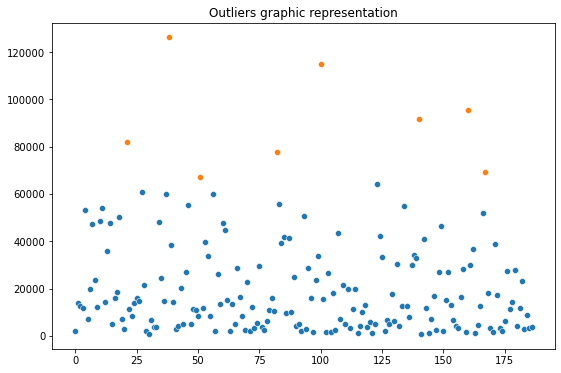

---------------------------------------------------------------------------------------------------- 



,Code zone,PIB moyen par habitant,zscore
38,128,126144.0,4.763987
100,256,114986.0,4.258786
160,200,95310.3,3.367929
140,179,91738.8,3.206222
21,17,81835.0,2.757808
82,104,77749.2,2.572815
167,211,69103.6,2.181368
51,225,67183.6,2.094436


In [84]:
outliers = data_gdp_per_hab.copy()
outliers["zscore"] = (outliers["PIB moyen par habitant"] - outliers["PIB moyen par habitant"].mean())/outliers["PIB moyen par habitant"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["PIB moyen par habitant"].index, y=the_ok["PIB moyen par habitant"].values,)
sns.scatterplot(x=the_outliers["PIB moyen par habitant"].index, y=the_outliers["PIB moyen par habitant"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on PIB per inhabitant.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

In [85]:
print("Numbers of outliers detected :", len(the_outliers))

Numbers of outliers detected : 8


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 8</br></li>
<i><li> The most important average GDP per inhabitant in the world are in : China (Macao territory), Luxemburg, Singapore, Qatar, Bermuda, Irland, Swiss and United Arab Emirates</li>
</i></div>

<a id='another_cell_l'></a>

#### 4. [data_inflation.csv](http://localhost:8888/edit/data_inflation_food_month_2017.csv) : exploration and data cleaning

- Loading file:

In [86]:
data_inflation = pd.read_csv('data_inflation_food_month_2017.csv', sep=';')

- First 5 rows display :

In [87]:
data_inflation.head()

,Code zone,Zone,Année,Code Produit,Produit,Mois,Unité,Valeur
0,2,Afghanistan,2017,23014,Food price inflation,Janvier,%,4.730651
1,2,Afghanistan,2017,23014,Food price inflation,Février,%,4.553673
2,2,Afghanistan,2017,23014,Food price inflation,Mars,%,10.028383
3,2,Afghanistan,2017,23014,Food price inflation,Avril,%,9.367880
4,2,Afghanistan,2017,23014,Food price inflation,Mai,%,10.723921


- Group by Zone for year 2017 :

In [88]:
data_inflation = data_inflation.groupby(by="Zone").sum() /12
data_inflation.head()

,Code zone,Année,Code Produit,Valeur
Zone,,,,
Afghanistan,2.0,2017.0,23014.0,6.957529
Afrique du Sud,202.0,2017.0,23014.0,6.902628
Albanie,3.0,2017.0,23014.0,3.924578
Algérie,4.0,2017.0,23014.0,5.040496
Allemagne,79.0,2017.0,23014.0,2.762497


- Number of rows and columns :

In [89]:
data_inflation.shape

(202, 4)

- .info display :

In [90]:
data_inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, Afghanistan to Îles d'Åland
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code zone     202 non-null    float64
 1   Année         202 non-null    float64
 2   Code Produit  202 non-null    float64
 3   Valeur        202 non-null    float64
dtypes: float64(4)
memory usage: 7.9+ KB


- Check missing and duplicate values :

In [91]:
check_nan(data_inflation, "Code zone")
check_duplicates(data_inflation,"Code zone")

The column Code zone does not contain any missing values
The column Code zone does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Inflation data give information on the average inflation in 2017 for each country in the world : their zone code (primary key), the name of zone and the value of this average inflation per country</br></li>
<li> There are 202 countries concerned in 2017</li>
<li> The data file does not contain any missing value or duplicates on the primary key</li>
</i></div>

- Rename the column "Valeur" :

In [92]:
data_inflation.rename(columns={"Valeur":"Inflation (%)"}, inplace=True)

- Removed some unnecessary columns :

In [93]:
data_inflation.to_csv("export_data_inflation.csv", sep=';')
data_inflation = pd.read_csv("export_data_inflation.csv", sep=';')
data_inflation.drop(columns =['Zone', 'Année', 'Code Produit'], inplace=True)
data_inflation.head()

,Code zone,Inflation (%)
0,2.0,6.957529
1,202.0,6.902628
2,3.0,3.924577
3,4.0,5.040496
4,79.0,2.762497


- Outliers on the variable "Inflation" : 

---------------------------------------------------------------------------------------------------- 



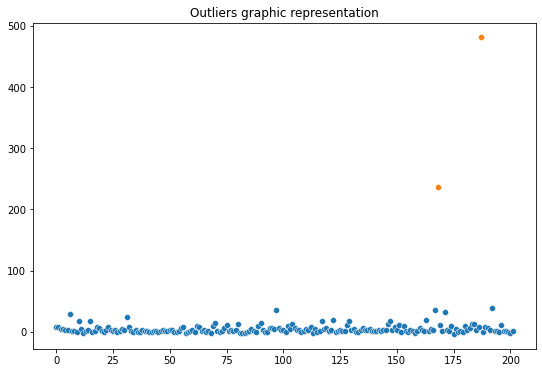

---------------------------------------------------------------------------------------------------- 



,Code zone,Inflation (%),zscore
187,236.0,480.863389,12.502277
168,277.0,236.952454,6.055100


In [94]:
outliers = data_inflation.copy()
outliers["zscore"] = (outliers["Inflation (%)"] - outliers["Inflation (%)"].mean())/outliers["Inflation (%)"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["Inflation (%)"].index, y=the_ok["Inflation (%)"].values,)
sns.scatterplot(x=the_outliers["Inflation (%)"].index, y=the_outliers["Inflation (%)"].values)
plt.title('Outliers graphic representation')
plt.savefig("Part1.Outliers graphic representation on inflation.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
the_outliers.sort_values(by=["zscore"], ascending=False)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 2</br></li>
<i><li> The highest inflation rates in 2017 were found in: Venezuela and South Sudan</li>
</i></div>

<a id='another_cell_m'></a>

#### 5. Final merge, explore and clean

In [95]:
chickenALL = chickenALL1.merge(data_pop, how='left', on='Code zone').merge(data_pol_stab, how='left', on='Code zone').merge(data_gdp_per_hab, how='left', on='Code zone').merge(data_inflation, how='left', on='Code zone')
display(chickenALL.head())

,Code zone,Zone,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en kg),Production de poulet (en tonnes),Exportation de poulet (en tonnes),Importation de poulet (en tonnes),Population (en unité),Indice de stabilité politique,PIB moyen par habitant,Inflation (%)
0,2,Afghanistan,55000,57000,1.53,28000.0,0.0,29000,36296113.0,-2.80,2058.4,6.957529
1,202,Afrique du Sud,2035000,2118000,35.69,1667000.0,63000.0,514000,57009756.0,-0.28,13860.3,6.902628
2,3,Albanie,47000,47000,16.36,13000.0,0.0,38000,2884169.0,0.38,12771.0,3.924577
3,4,Algérie,264000,277000,6.38,275000.0,0.0,2000,41389189.0,-0.92,11737.4,5.040496
4,79,Allemagne,1609000,1739000,19.47,1514000.0,646000.0,842000,82658409.0,0.59,53071.5,2.762497


- Explore the final result :

In [96]:
chickenALL.shape

(170, 12)

In [97]:
chickenALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code zone                                               170 non-null    int64  
 1   Zone                                                    170 non-null    object 
 2   Consommation de poulet (en tonnes)                      170 non-null    int64  
 3   Disponibilité de poulet (en tonnes)                     170 non-null    int64  
 4   Disponibilité alimentaire moyenne par habitant (en kg)  170 non-null    float64
 5   Production de poulet (en tonnes)                        170 non-null    float64
 6   Exportation de poulet (en tonnes)                       170 non-null    float64
 7   Importation de poulet (en tonnes)                       170 non-null    int64  
 8   Population (en unité)                   

- Check duplicate values :

In [98]:
check_duplicates(chickenALL,"Code zone")

The column Code zone does not contain duplicates


- Fill NA/NaN values :

In [99]:
chickenALL["PIB moyen par habitant"].fillna(0, inplace=True)
chickenALL["Inflation (%)"].fillna(0, inplace=True)
chickenALL.info()
chickenALL.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code zone                                               170 non-null    int64  
 1   Zone                                                    170 non-null    object 
 2   Consommation de poulet (en tonnes)                      170 non-null    int64  
 3   Disponibilité de poulet (en tonnes)                     170 non-null    int64  
 4   Disponibilité alimentaire moyenne par habitant (en kg)  170 non-null    float64
 5   Production de poulet (en tonnes)                        170 non-null    float64
 6   Exportation de poulet (en tonnes)                       170 non-null    float64
 7   Importation de poulet (en tonnes)                       170 non-null    int64  
 8   Population (en unité)                   

,Code zone,Zone,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en kg),Production de poulet (en tonnes),Exportation de poulet (en tonnes),Importation de poulet (en tonnes),Population (en unité),Indice de stabilité politique,PIB moyen par habitant,Inflation (%)
0,2,Afghanistan,55000,57000,1.53,28000.0,0.0,29000,36296113.0,-2.80,2058.4,6.957529
1,202,Afrique du Sud,2035000,2118000,35.69,1667000.0,63000.0,514000,57009756.0,-0.28,13860.3,6.902628
2,3,Albanie,47000,47000,16.36,13000.0,0.0,38000,2884169.0,0.38,12771.0,3.924577
3,4,Algérie,264000,277000,6.38,275000.0,0.0,2000,41389189.0,-0.92,11737.4,5.040496
4,79,Allemagne,1609000,1739000,19.47,1514000.0,646000.0,842000,82658409.0,0.59,53071.5,2.762497


<a id='another_cell_n'></a>

#### Conclusion (part I/b)

<div class="alert-success">
<i>→ We have 4 variables of global macroeconomic and political data</i></br>
<i><br>→ There are between 187 and 235 countries concerned by these variables</br></i>
<i><br>→ We have grouped the monthly dataframe "Inflation" by year, taking care to average the inflation rate by country over the 12 months of 2017</i></br>
<i><br>→ All data files do not contain any missing value or duplicates on the primary key ("Code zone")</i></br>
<i><br>→ All data files contain between 2 and 10 data outliers :</i></br>
<i><br>---- 🗴 Yemen, Afghanistan, Syria, South Soudan, Pakistan, Libya, Iraq, Congo and Somalia are the most unstable countries in the world ; at first glance, these countries do not seem to be good customers for La Poule qui chante</i></br>
<i><br>---- 🗴 The highest inflation rates in 2017 were found in Venezuela and South Sudan ; these countries do not seem to be good customers for La Poule qui chante too</i></br>
<i><br>---- 🗸 China, India and USA have the most important demographies in the world ; at first glance, these countries seem to be good clients for La Poule qui chante</i></br>
<i><br>---- 🗸 China (Macao territory), Luxemburg, Singapore, Qatar, Bermuda, Irland, Swiss and United Arab Emirates have the most important average GDP per inhabitant in the world ; these countries seem to be good clients for La Poule qui chante too</i></br>
</i></div>

<a id='another_cell_o'></a> 

### Conclusion

In [100]:
chickenALL = chickenALL.drop(["Code zone"], axis=1)
chicken = chickenALL.groupby(by="Zone").sum()
chicken.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Consommation de poulet (en tonnes)                      170 non-null    int64  
 1   Disponibilité de poulet (en tonnes)                     170 non-null    int64  
 2   Disponibilité alimentaire moyenne par habitant (en kg)  170 non-null    float64
 3   Production de poulet (en tonnes)                        170 non-null    float64
 4   Exportation de poulet (en tonnes)                       170 non-null    float64
 5   Importation de poulet (en tonnes)                       170 non-null    int64  
 6   Population (en unité)                                   170 non-null    float64
 7   Indice de stabilité politique                           170 non-null    float64
 8   PIB moyen par habitant    

In [101]:
chicken.head()

,Consommation de poulet (en tonnes),Disponibilité de poulet (en tonnes),Disponibilité alimentaire moyenne par habitant (en kg),Production de poulet (en tonnes),Exportation de poulet (en tonnes),Importation de poulet (en tonnes),Population (en unité),Indice de stabilité politique,PIB moyen par habitant,Inflation (%)
Zone,,,,,,,,,,
Afghanistan,55000,57000,1.53,28000.0,0.0,29000,36296113.0,-2.80,2058.4,6.957529
Afrique du Sud,2035000,2118000,35.69,1667000.0,63000.0,514000,57009756.0,-0.28,13860.3,6.902628
Albanie,47000,47000,16.36,13000.0,0.0,38000,2884169.0,0.38,12771.0,3.924577
Algérie,264000,277000,6.38,275000.0,0.0,2000,41389189.0,-0.92,11737.4,5.040496
Allemagne,1609000,1739000,19.47,1514000.0,646000.0,842000,82658409.0,0.59,53071.5,2.762497


<div class="alert-success">
<i>→ We have 10 variables in the final dataframe : 6 variables of consumption and sale of chicken in the world and 4 variables of global macroeconomic and political data</i></br>
<i><br>→ 170 countries are concerned by these variables</br></i>
<i><br>→ All data files do not contain any missing value or duplicates on the primary key ("Code zone")</i></br>
<i><br>→ The results of the exploration show us that, in view of the selection criteria, China seems to be a very good client for La Poule qui chante, but also to a lesser extent Japan, Mexico, Germany, England, Saoudia, South Africa, Luxemburg, Singapore, Qatar, Bermuda, Irland, Swiss and United Arab Emirates</i></br>

In [102]:
chicken.to_csv("export_chicken.csv", sep=';')